In [15]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

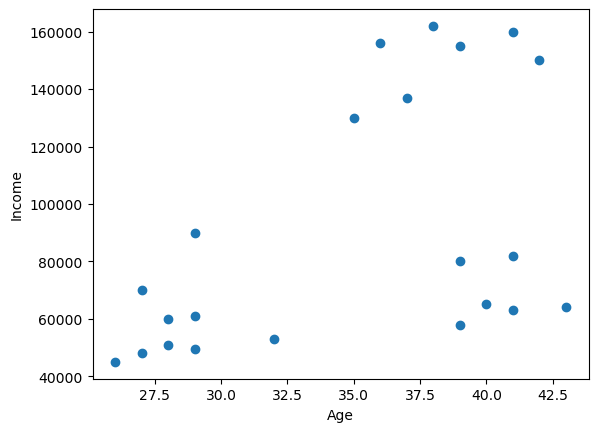

In [17]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [18]:
km = KMeans(n_clusters=3)
km


KMeans(n_clusters=3)

In [19]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
df['cluster'] = y_predicted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


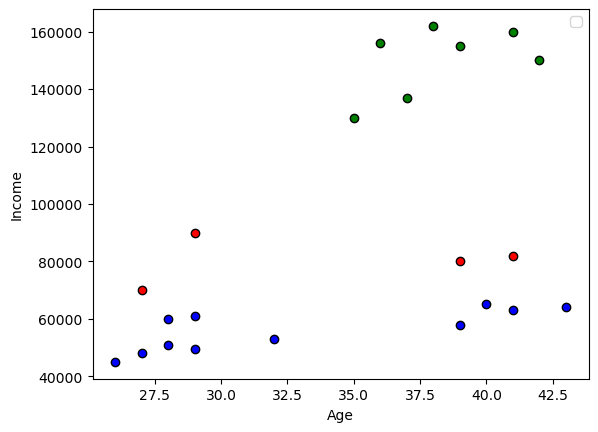

In [20]:

df1 =df[ df.cluster==0]
df2 =df[ df.cluster==1]
df3 =df[ df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green', edgecolors='black')
plt.scatter(df2.Age, df2['Income($)'], color = 'blue', edgecolors='black')
plt.scatter(df3.Age, df3['Income($)'], color = 'red', edgecolors='black')


plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()




In [24]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [26]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
df['cluster'] = y_predicted

In [28]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


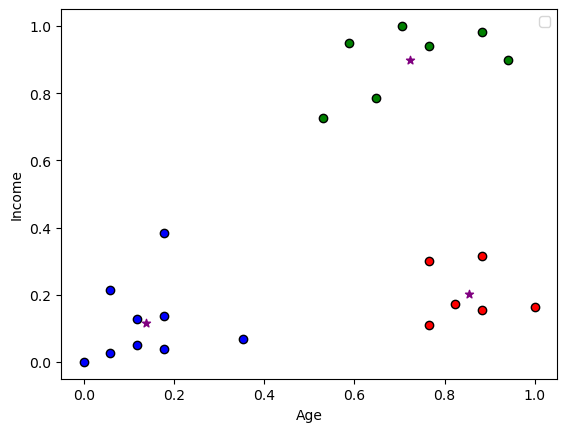

In [29]:

df1 =df[ df.cluster==0]
df2 =df[ df.cluster==1]
df3 =df[ df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green', edgecolors='black')
plt.scatter(df2.Age, df2['Income($)'], color = 'blue', edgecolors='black')
plt.scatter(df3.Age, df3['Income($)'], color = 'red', edgecolors='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*')


plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()


In [30]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

c:\Users\bhavy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


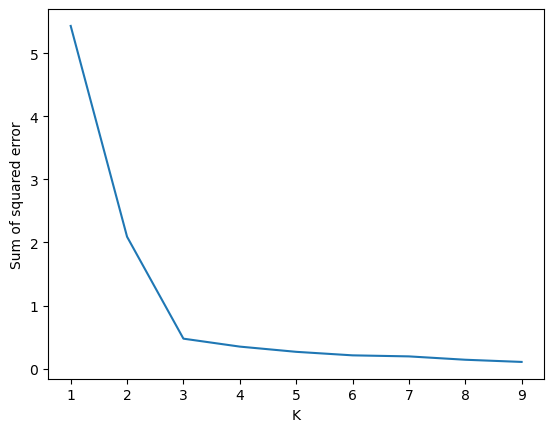

In [31]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)